In [311]:
# Group 29 | Assignment 8 | Image restoration
# Author: Yash Kumar Sahu | Roll No: CED19I039 
#         Radhika Mittal  |          CED19I050
#         Deep Patel      |          ME21D0004

## Question

    1. Consider the lena grayscale image as f(x,y) and apply gaussian filter using builtin function(let it be h). Call the resultant as g(x,y). Now find f(x,y) from g(x,y) using the formula g(x,y) = f(x,y) *h(x,y) (Hint: go through the solution of g = f*h given in the class apply the same for finding f)
    
    2. In the problem 1, find f(x,y) using g(x,y) = f(x,y)*h + n where n is the noise term. Add noise n using the inbuilt function of salt and pepper noise and find f. Display the results obtained.

## Libraries

In [312]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath
from scipy.fftpack import fftn, ifftn, fftshift

## Read Lena

In [313]:
cwd = os.getcwd()                                            # get current directory
img_lena = cv2.imread(cwd+"/Lena.png") 
f = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)               # Convert to grayscale


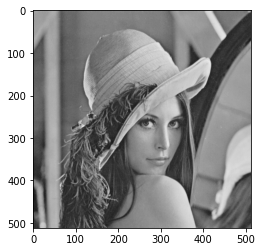

In [314]:
plt.imshow(f, cmap='gray', vmin = 0, vmax = 255)           # show lena grayscale

## Apply gaussian filter Lena

In [315]:
h_1d = cv2.getGaussianKernel(7, 2.5)
h_2d_np=h_1d*h_1d.T

#computing the number of padding on one side
a=int(f.shape[0]//2-h_2d_np.shape[0]//2)
h=np.pad(h_2d_np,(a,a-1),'constant',constant_values=(0))  
#print(h.shape)

F = fftn(f)
H = fftn(h)


G = np.multiply(F,H)

g = fftshift(ifftn(G).real)



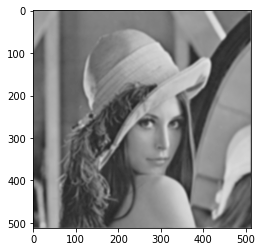

In [316]:
plt.imshow(g, cmap='gray', vmin = 0, vmax = 255)           # show filtered lena grayscale image

## Find f(x,y)

In [317]:
F_hat = np.divide(G,H)
f_hat = ifftn(F_hat).real

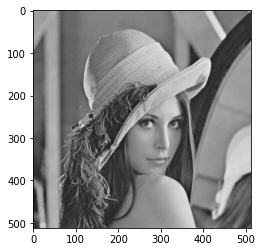

In [318]:
plt.imshow(f_hat, cmap='gray', vmin = 0, vmax = 255)  